In [1]:
from __future__ import print_function
from orthopoly import PseudoSpectralDiscretization1D
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
t0,tmax = 0.,10.
cfl = 0.1
eta_crit = 0.0
order = 60
xmin,xmax = -1.,1.
s = PseudoSpectralDiscretization1D(order,xmin,xmax,
                                   eta_crit,order)
x = s.get_x()

sigma = 0.5/3
u0 = np.exp(-(x**2)/(2*sigma**2)) + 2

dxs = x[1:] - x[:-1]
dx = np.min(dxs)
dt = cfl*dx

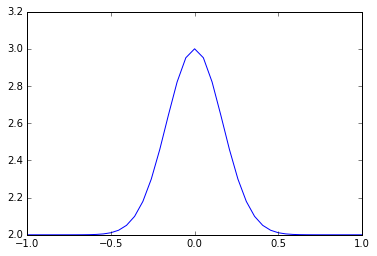

In [19]:
plt.plot(x,u0)

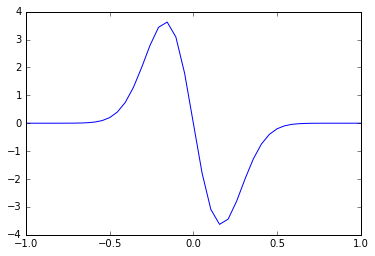

In [20]:
plt.plot(x,s.differentiate(u0))

In [21]:
def rhs(t,u):
    F = 0.5*u*u
    dF = s.differentiate(F)
    visc = s.spectral_viscosity(u)#s.rhs_filter(u)
    out = -dF + visc
    return out

In [22]:
def enforce_boundary_condition(u):
    out = u.copy()
    out[0] = u[-1]
    return out

In [23]:
def rk4_step(t,u,dt):
    k1 = enforce_boundary_condition(rhs(t,u))
    k2 = enforce_boundary_condition(rhs(t+0.5*dt,
                                       u+0.5*k1*dt))
    k3 = enforce_boundary_condition(rhs(t+0.5*dt,
                                       u+0.5*k2*dt))
    k4 = enforce_boundary_condition(rhs(t+dt,u+k3*dt))
    unew = enforce_boundary_condition(u+(1.0/6)*dt*(k1+2*k2+2*k3+k4))
    tnew = t+dt
    unew[unew<0] = 0
    return tnew,unew

In [24]:
def get_mass(u):
    return np.sum(s.weights*u)

In [25]:
times = np.arange(t0,tmax+dt,dt)
num_steps = len(times)
us = np.empty((times.shape[0],u0.shape[0]))
us[0] = u0
masses = np.empty_like(times)
masses[0] = get_mass(u0)
for i in range(num_steps-1): 
    tnew,unew = rk4_step(times[i],us[i],dt)
    us[i+1] = unew
    masses[i+1] = get_mass(us[i+1])

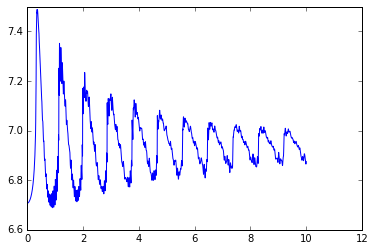

In [26]:
i = len(times)
plt.plot(times[:i],masses[:i])

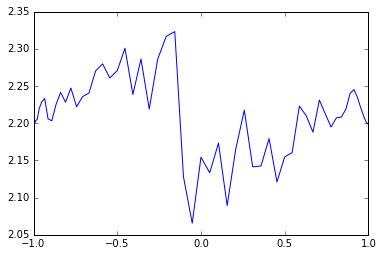

In [29]:
i = 70000
plt.plot(x,us[i])

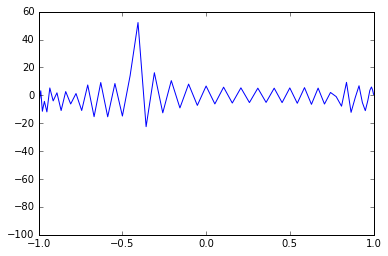

In [12]:
plt.plot(x,rhs(0,us[4000]))

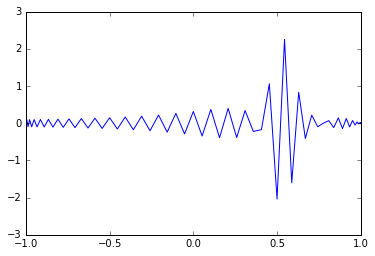

In [13]:
plt.plot(x,s.rhs_filter(us[1000]))

In [27]:
num_steps

72969

In [15]:
s.s

4.0943445622221004

In [16]:
s.viscous_C

60